In [1]:
from Portfolio import Portfolio, universe # universe is a global variable
# and each portfolio can access to the universe


In [2]:
import imp
from Admin import Admin, MeanReturn, MoneyWeightedReturn,SimpleReturn,TimeWeightedReturn,Volatility, PortfolioVaR, SharpeRatio, calculate_drawdown
import pandas as pd
# imp.reload(Admin)

In [3]:
universe.get_security('GAPSX').price

Unnamed: 0
2000-01-01          NaN
2000-01-02          NaN
2000-01-03     8.299891
2000-01-04     8.095037
2000-01-05     8.009132
2000-01-06     7.962875
2000-01-07     8.134686
2000-01-08     8.134686
2000-01-09     8.134686
2000-01-10     8.233809
2000-01-11     8.174335
2000-01-12     8.134686
2000-01-13     8.227203
2000-01-14     8.299891
2000-01-15     8.299891
2000-01-16     8.299891
2000-01-17     8.299891
2000-01-18     8.280067
2000-01-19     8.253634
2000-01-20     8.233809
2000-01-21     8.200769
2000-01-22     8.200769
2000-01-23     8.200769
2000-01-24     8.075214
2000-01-25     8.035563
2000-01-26     8.048779
2000-01-27     8.068607
2000-01-28     7.923225
2000-01-29     7.923225
2000-01-30     7.923225
                ...    
2019-05-03    18.740000
2019-05-04    18.740000
2019-05-05    18.740000
2019-05-06    18.590000
2019-05-07    18.270000
2019-05-08    18.250000
2019-05-09    18.150000
2019-05-10    18.240000
2019-05-11    18.240000
2019-05-12    18.240000
2019-

We are in a good state, target weights with short selling returned


([(0.127, 0.127)],
 [{'MRD.TO': 0.0805527290394428,
   'CIM.AX': -0.029362363650522368,
   'GAPSX': 1.1187369544863859,
   'LNC': -0.30622846166924916,
   'KNEBV.HE': 0.13630114179394262}])

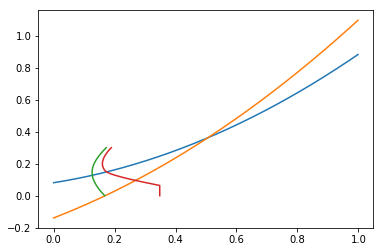

In [4]:
#Initialize admin
test_admin=Admin()
#
test_admin.suggestPortfolio('1','2014-04-01')

In [5]:
test_admin.acceptPortfolio(0)
test_admin.getAccountValue('2014-04-01')

199980.0019998

In [6]:
test_admin.trackPortfolio(rebalance_flag=True,rebalance_freq='3MS',rebal_start_date='2014-09-01')

In [7]:
test_admin.portfolio

{'2014-04-01': <Portfolio.Portfolio at 0x1096704a8>,
 '2014-09-01': <Portfolio.Portfolio at 0x1c1666ff28>,
 '2014-12-01': <Portfolio.Portfolio at 0x1c1666f470>,
 '2015-03-01': <Portfolio.Portfolio at 0x1c1665b3c8>,
 '2015-06-01': <Portfolio.Portfolio at 0x1c1665b7f0>,
 '2015-09-01': <Portfolio.Portfolio at 0x1c1664a128>,
 '2015-12-01': <Portfolio.Portfolio at 0x1c1664a748>,
 '2016-03-01': <Portfolio.Portfolio at 0x1c1664ab70>,
 '2016-06-01': <Portfolio.Portfolio at 0x1c164db470>,
 '2016-09-01': <Portfolio.Portfolio at 0x1c164db8d0>,
 '2016-12-01': <Portfolio.Portfolio at 0x1c164db9e8>,
 '2017-03-01': <Portfolio.Portfolio at 0x1c165026d8>,
 '2017-06-01': <Portfolio.Portfolio at 0x1c164db630>,
 '2017-09-01': <Portfolio.Portfolio at 0x1c16502128>,
 '2017-12-01': <Portfolio.Portfolio at 0x1c164dbf98>,
 '2018-03-01': <Portfolio.Portfolio at 0x1c16502198>,
 '2018-06-01': <Portfolio.Portfolio at 0x1c16502ef0>,
 '2018-09-01': <Portfolio.Portfolio at 0x1c16502f98>,
 '2018-12-01': <Portfolio.Por

In [8]:
start_date='2014-04-01'
test_admin.getAccountValue(start_date)

199980.0019998

We are in a good state, target weights with short selling returned


199980.0019998

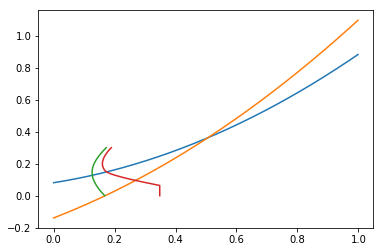

In [9]:
test_admin_norebal=Admin()
#
test_admin_norebal.suggestPortfolio('1',start_date)
test_admin_norebal.acceptPortfolio(0)
test_admin_norebal.trackPortfolio(rebalance_flag=False)
test_admin_norebal.getAccountValue(start_date)

In [10]:
from datetime import datetime
date_format='%Y-%m-%d'
today_date=test_admin.today
all_dates=[datetime.strftime(item,date_format) for item in pd.date_range(start_date,today_date,freq='M')]
portf_values=[]
portf_values_norebal=[]
for item in all_dates:
    portf_values.append(test_admin.getAccountValue(item))
    portf_values_norebal.append(test_admin_norebal.getAccountValue(item))
    

In [11]:
portf_values=[]
portf_values_norebal=[]
for item in all_dates:
    portf_values.append(test_admin.getAccountValue(item))
    portf_values_norebal.append(test_admin_norebal.getAccountValue(item))
    

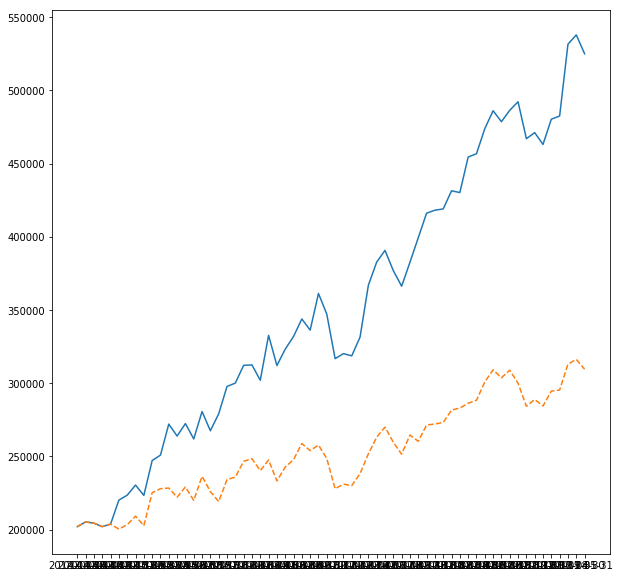

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(all_dates,portf_values)
plt.plot(all_dates,portf_values_norebal,'--')

In [13]:
import numpy as np
portfolio1_values=pd.DataFrame([np.float(item) for item in portf_values],index=all_dates,columns=['Rebal'])
portfolio1_values['NoRebal']=[np.float(item) for item in portf_values_norebal]

In [14]:
#portfolio1_values.to_csv('/Users/jkhai/RoboAdvisor/Reports/portfolio1_values.csv')

## Risk Metrics

In [15]:
start_dates=['2019-03-01', '2018-06-01', "2014-04-01"] 
risk_metrics_table = pd.DataFrame()
for start_date in start_dates:
    risks = []
    risks.append(MeanReturn(test_admin.portfolio,start_date,today_date))
    risks.append(SimpleReturn(test_admin.portfolio,start_date,today_date))
    risks.append(TimeWeightedReturn(test_admin.portfolio,test_admin.cash_transacs,start_date,today_date))
    #print(TimeWeightedReturn(benchmark.portfolio,benchmark.cash_transacs,start_date,today_date))
    risks.append(MoneyWeightedReturn(test_admin.portfolio,test_admin.cash_transacs,start_date,today_date))
    risks.append(Volatility(test_admin.portfolio,start_date,today_date))
    risks.append(SharpeRatio(test_admin.portfolio,start_date,today_date, universe.get_security("rf_rate_cad")))
    risks.append(calculate_drawdown(test_admin, start_date, today_date)[1])
    risk_metrics_table[start_date] = pd.Series(risks, index=["Mean Return", "Simple Return", "Time W. Return",
                                                             "Money W. Return","Vol", "Sharpe Ratio", "Max Drawdown"])
risk_metrics_table

,2019-03-01,2018-06-01,2014-04-01
Mean Return,-0.075772,0.075895,0.176228
Simple Return,0.162446,0.099717,0.205258
Time W. Return,-0.003425,0.017664,0.080780
Money W. Return,0.364379,0.191253,0.367308
Vol,0.062868,0.123791,0.141726
Sharpe Ratio,2.215123,0.636545,1.398033
Max Drawdown,-0.023879,-0.059162,-0.123238


In [16]:
print(SharpeRatio(test_admin.portfolio,start_date,today_date, universe.get_security("rf_rate_cad")))

1.3980330702762889


In [17]:
calculate_drawdown(test_admin, start_date, today_date)
# all_dates=[datetime.strftime(item,"%Y-%m-%d") for item in pd.date_range('2014-04-01',today_date,freq='M')]

# calculate_drawdown(compute_ret(pd.Series([test_admin.getAccountValue(d) for d in all_dates])))
# #pd.Series([test_admin.getAccountValue(d) for d in all_dates])

(1     0.000000
 2    -0.004161
 3    -0.015663
 4    -0.007317
 5     0.000000
 6     0.000000
 7     0.000000
 8    -0.030626
 9     0.000000
 10    0.000000
 11    0.000000
 12   -0.029998
 13    0.000000
 14   -0.038462
 15    0.000000
 16   -0.046753
 17   -0.005553
 18    0.000000
 19    0.000000
 20    0.000000
 21    0.000000
 22   -0.033516
 23    0.000000
 24   -0.061977
 25   -0.028487
 26   -0.002371
 27    0.000000
 28   -0.022186
 29    0.000000
 30   -0.039179
         ...   
 32   -0.113778
 33   -0.117897
 34   -0.082491
 35    0.000000
 36    0.000000
 37    0.000000
 38   -0.035418
 39   -0.062574
 40   -0.020798
 41    0.000000
 42    0.000000
 43    0.000000
 44    0.000000
 45    0.000000
 46   -0.002726
 47    0.000000
 48    0.000000
 49    0.000000
 50    0.000000
 51   -0.015425
 52    0.000000
 53    0.000000
 54   -0.051245
 55   -0.042807
 56   -0.059162
 57   -0.024185
 58   -0.019741
 59    0.000000
 60    0.000000
 61   -0.023879
 Length: 61, dtype: floa

In [18]:
from Admin import ReturnAttribCurrency

In [19]:
betas, VaRannual=PortfolioVaR(test_admin,start_date,today_date,True)
VaRannual

80064.8315687847

In [20]:
ReturnAttribCurrency(test_admin.PortfolioWeights,'2019-03-01','2019-06-01')

(Currency
 AUD    0.000031
 CAD    0.000000
 EUR    0.000750
 USD    0.022256
 Name: Return Contribution, dtype: float64,
 0.015903283199458884,
 0.038773631077384005)

In [21]:
def MarginalVaRs(account,fit_start_date,fit_end_date):
    #Think about currency
    #fit model in local currency, aggregate to potfolio level in CAD
    #when to do conversion for risk metrics???
    import scipy as sp
    from HelperFunctions import fill_missing_data_business
    result_df = pd.DataFrame()
    factor_tickers = universe._riskFactors.keys()
    #print(factor_tickers)
    for k in factor_tickers:
        result_df[k] = fill_missing_data_business(universe._riskFactors[k].price, fit_start_date, fit_end_date,freq='B')
    factor_cov=result_df.cov()*252
    model1={}
    for item in account.PortfolioWeights.keys():
        model1[item]=universe.fitFactorModel(item,fit_start_date,252*5).params
    betas=pd.DataFrame(index=list(model1.keys()),columns=factor_cov.index)
    for item in model1.keys():
        betas.loc[item,:]=model1[item].reindex(factor_cov.index,fill_value=0)
#     print(betas)
    sec_cov=pd.DataFrame(np.dot(betas,np.dot(factor_cov,betas.transpose())),index=list(model1.keys()),columns=list(model1.keys()))
    weights=[np.float(item) for item in list(account.PortfolioWeights.values())]
    portf_vol=np.sqrt(np.dot(weights,np.dot(sec_cov,weights)))
    
    sec_result_df=np.dot(result_df,betas.transpose())
#     print(sec_result_df)
#     sec_result_df_out=sec_result_df.reindex(columns=list(sec_result_df.columns)+['Portfolio'])
#     sec_result_df_out.loc[:'Portfolio']=
    portf_series=np.array(np.matmul(np.array(weights),np.array(sec_result_df).astype(float).transpose())).astype(np.float64)
    
    sec_result_df_out=pd.DataFrame(np.concatenate((sec_result_df,portf_series.reshape(-1,1)),axis=1),columns=list(betas.index)+['Portfolio'],index=result_df.index)
#     print(sec_result_df_out)

    result_df_cov=252*sec_result_df_out.astype(np.float64).cov()
#     print(result_df_cov)
    betas_new=result_df_cov.loc[:,'Portfolio'].divide(portf_vol**2)    
    MVaRs=betas_new*sp.stats.norm.ppf(0.95)*portf_vol
    #now to dollar value
    cur_doll_val=[]
    for item in account.PortfolioWeights.keys():
        cur_doll_val.append(np.float(account.portfolio[fit_end_date].portfolio[item]*universe.get_price_in_currency(item,fit_end_date,'CAD')))
#     np.multiply(MVaRs[:-1],cur_doll_val)
#     print(cur_doll_val)
    return np.multiply(MVaRs[:-1],cur_doll_val)

In [22]:
# from Admin import MarginalVaRs
Mar_vars=MarginalVaRs(test_admin,start_date,today_date)

In [23]:
Mar_vars

MRD.TO        1525.123930
CIM.AX       -1147.999252
GAPSX       118458.227648
LNC         -46038.102952
KNEBV.HE      5663.511586
Name: Portfolio, dtype: float64

In [24]:
from HelperFunctions import fill_missing_data_business
factor_tickers = universe._riskFactors.keys()
    #print(factor_tickers)
result_df = pd.DataFrame()
for k in factor_tickers:
    result_df[k] = fill_missing_data_business(universe._riskFactors[k].price, start_date, today_date,'BM')

In [25]:
result_df['Portfolio']=np.dot(np.dot(result_df,betas.transpose()),weights).astype(numpy.float64)

NameError: name 'weights' is not defined

In [ ]:
new_df=result_df.copy()


In [ ]:
type(new_df['VIX'][0])

In [ ]:
#decomposing security return
def ReturnAttribCurrency(PortfolioWeights,d1,d2):
    df_tmp=pd.DataFrame(index=list(PortfolioWeights.keys()),columns=['Weights','Currency','LocalReturn','CADReturn','FX_appr'])
    for sec_name in PortfolioWeights.keys():
        local_ret=universe.get_security(sec_name).price.loc[today_date]/universe.get_security(sec_name).price.loc['2019-03-01']-1
        report_ret=universe.get_price_in_currency(sec_name,today_date,'CAD')/universe.get_price_in_currency(sec_name,'2019-03-01','CAD')-1
        FX_app=(report_ret-local_ret)/(local_ret+1)

        df_tmp.loc[sec_name,:]=[PortfolioWeights[sec_name],
                                universe.get_security(sec_name).currency,
                                local_ret,
                                report_ret,
                                FX_app]
    df_tmp['LocalReturnWeighted']=df_tmp['LocalReturn'].multiply(df_tmp['Weights'])
    df_tmp['CADReturnWeighted']=df_tmp['CADReturn'].multiply(df_tmp['Weights'])
    df_tmp['CurContrWeighted']=df_tmp['FX_appr'].multiply(df_tmp['Weights'])

    cur_contrib=df_tmp[['Currency','LocalReturnWeighted','CADReturnWeighted','CurContrWeighted']].groupby('Currency').sum()
    local_cur_return=cur_contrib.sum()['LocalReturnWeighted']
    report_cur_return=cur_contrib.sum()['CADReturnWeighted']
    cur_contrib.rename(columns={'CurContrWeighted':'Return Contribution'},inplace=True)
    return cur_contrib['Return Contribution'], local_cur_return, report_cur_return

In [ ]:
ReturnAttribCurrency(test_admin.PortfolioWeights,'2019-03-01',today_date)

In [ ]:
# df_tmp_weighted=
df_tmp['LocalReturnWeighted']=df_tmp['LocalReturn'].multiply(df_tmp['Weights'])
df_tmp['CADReturnWeighted']=df_tmp['CADReturn'].multiply(df_tmp['Weights'])
df_tmp['CurContrWeighted']=df_tmp['CurContr'].multiply(df_tmp['Weights'])
# .multiply(df_tmp['Weights'])

In [ ]:
df_tmp[['Currency','LocalReturnWeighted','CADReturnWeighted','CurContrWeighted']].groupby('Currency').sum()

In [ ]:
SimpleReturn(test_admin.portfolio,'2019-03-01',today_date,False)

In [ ]:
local_return

In [ ]:
np.dot(weights,local_return)

In [ ]:
PortfolioVaR(test_admin,)